# Options of builtin image viewer

This notebook will guide us through the options that are available to display images. To get started, let's import stuff..

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pvinspect as pv

In [3]:
seq = pv.data.datasets.poly10x6(N=10)

c:\users\mathis\dev\pvinspect\pvinspect\data\datasets\20191219_poly10x6


In [4]:
len(seq)

10

## Clipping

By default, images are clipped below the 0.001-th and above the 99.999-th percentile. This is to get rid of outliers that might otherwise make the image appear very dark or even black:

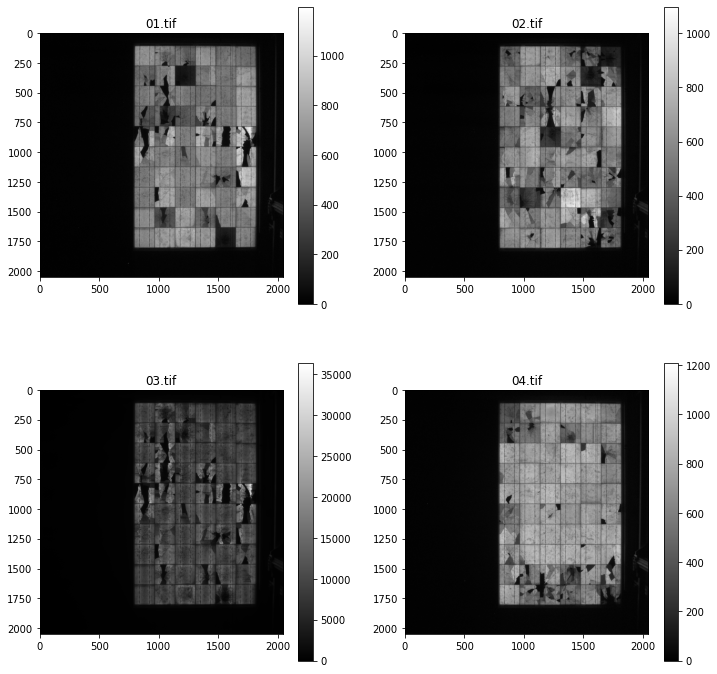

In [13]:
seq.head()

You can turn this off using the `clip_low` and `clip_high` options:

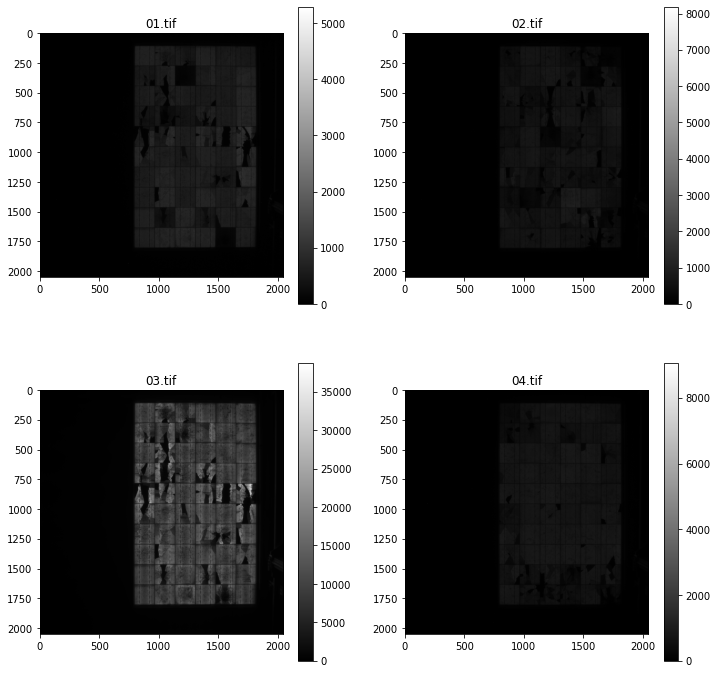

In [16]:
seq.head(clip_low=None, clip_high=None)

Of course, these options are available on single images as well:

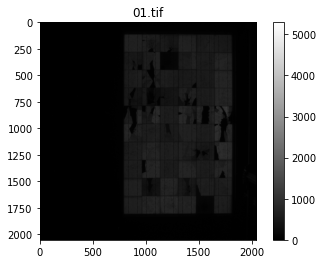

In [17]:
# access a single image
img = seq[0]

# show
img.show(clip_high=None)

And you can adjust them to your needs like this:

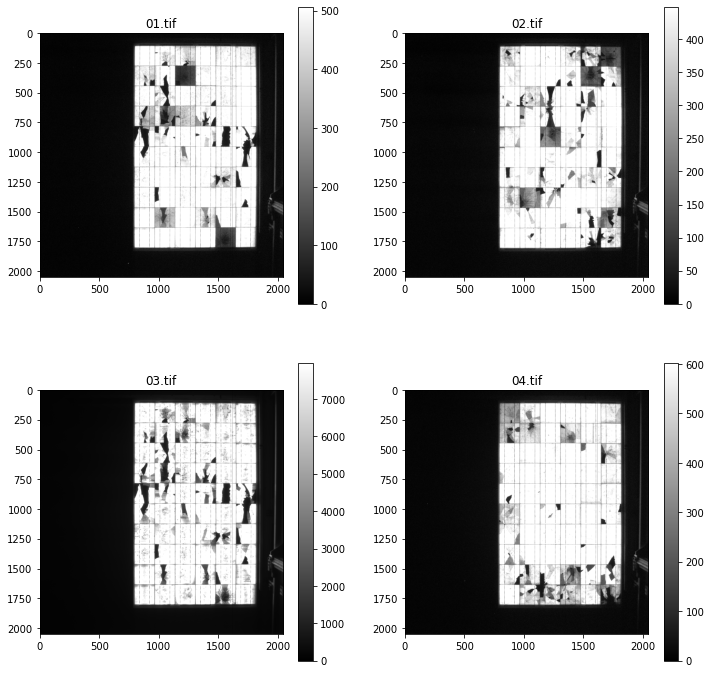

In [18]:
seq.head(clip_high=75)

## Viewer plugins

Furthermore, we can also specify custom viewer plugins. A viewer plugin receives the image to show as well as an arbitrary number of additional arguments. It can then plot data using *matplotlib* features. Please do not forget the `**kwargs` in the argument list:

In [7]:
from matplotlib import pyplot as plt
from pvinspect.data.show_plugin import ShowPlugin, register_show_plugin

class OverlayGeometry(ShowPlugin):

    def apply(
        self,
        ax: Axes,
        image: Image,
        show_module_geometry: bool = True,
        **kwargs
    ):
        """Draw the axes

        Args:
            show_module_geometry (bool): Show the configuration of this module
        """
        super().apply(ax, image, **kwargs)
        
        if show_module_geometry:
            text = 'rows: {:d}, cols: {:d}'.format(image.get_meta("rows"), image.get_meta("cols"))
            ax.text(100, 200, text, fontsize=12, horizontalalignment='left', verticalalignment='bottom', bbox=dict(facecolor='white', alpha=0.5))
    
    def is_active(self, image):
        super().is_active(image)
        return image.has_meta("cols") and image.has_meta("rows")


Finally, we register the plugin. Note that the optional `priority` argument determines the order in which plugins are called. Plugins with higher priority are called later and hence can plot on top of the results of other plugins:

In [8]:
pv.data.image.register_show_plugin(overlay_module_geometry, priority=10)

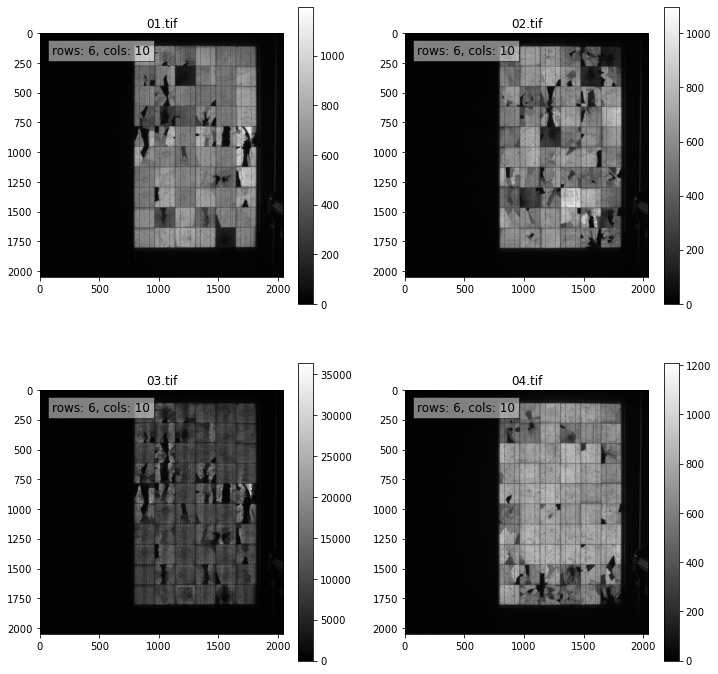

In [9]:
seq.head()

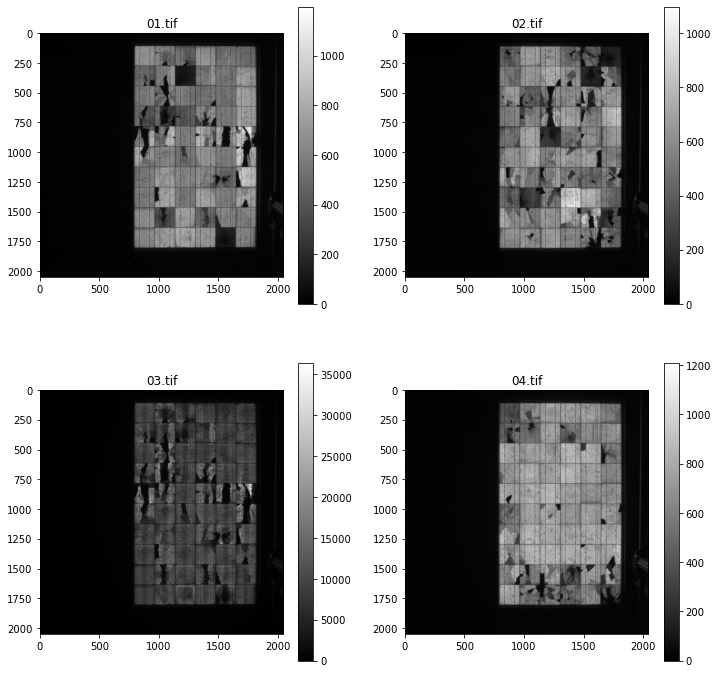

In [10]:
seq.head(show_module_geometry=False)

## Other options

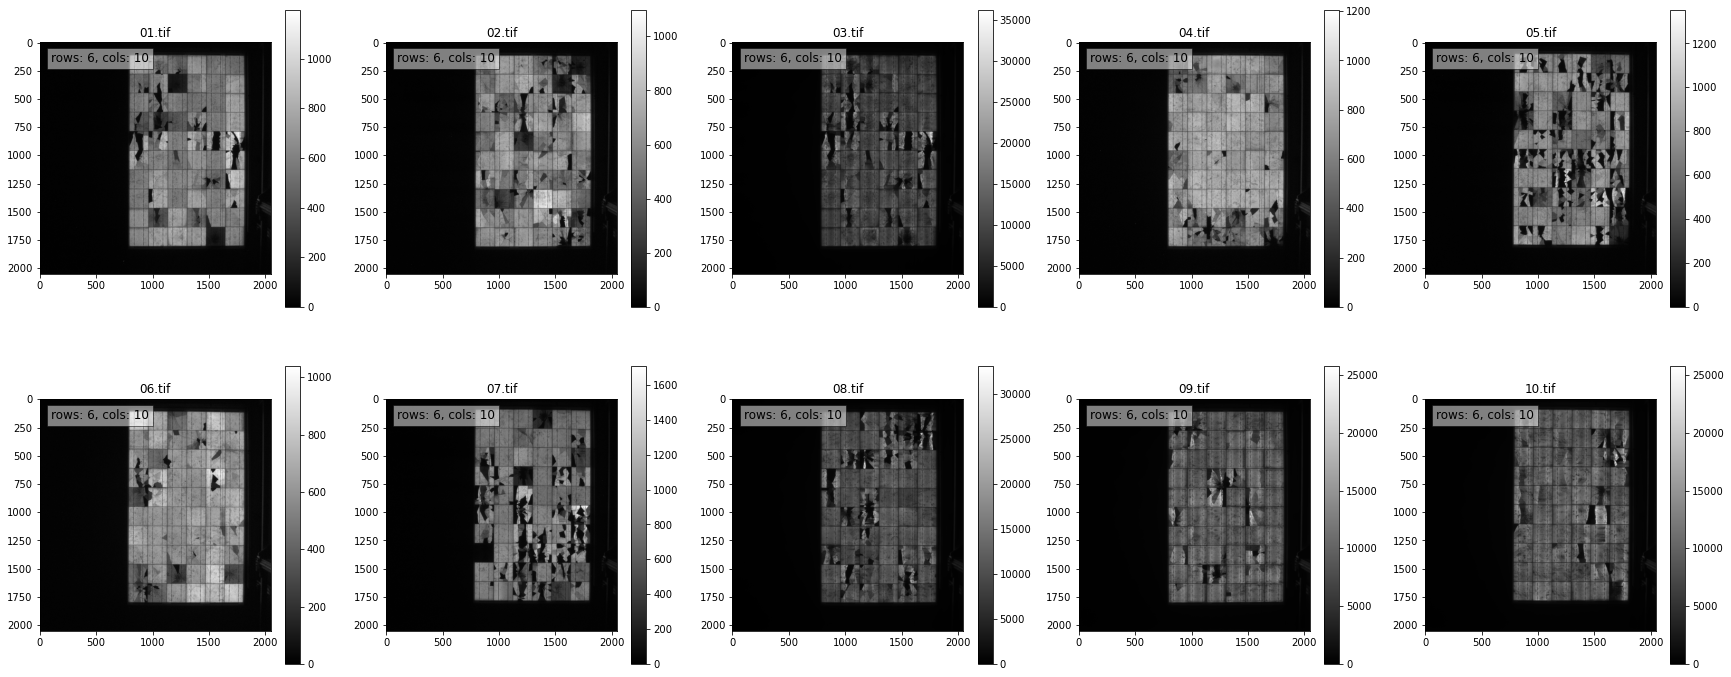

In [11]:
seq.head(N=10, cols=5)